# Binned Maximum Likelihood fit

In [1]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize, fsolve
from scipy.stats import norm, chi2, lognorm

In [2]:
measurements = np.array([97.8621, 114.105, 87.7593, 93.2134, 86.6624, 87.4629, 79.7712, \
91.5024, 87.7737, 89.6926, 133.506, 91.4124, 94.4401, 97.3968, \
108.424, 103.197, 88.2166, 142.217, 89.0393, 102.438, 95.7987, \
94.5177, 96.8171, 90.903, 132.463, 92.3394, 84.1451, 87.3447, \
92.2861, 84.4213, 124.017, 90.4941, 95.7992, 92.3484, 95.9813, \
88.0641, 101.002, 97.7268, 137.379, 96.213, 140.795, 99.9332, \
130.087, 108.839, 90.0145, 100.313, 87.5952, 92.995, 114.457, \
90.7526, 112.181, 117.857, 95.2804, 115.922, 117.043, 104.317, \
126.728, 87.8592, 89.9614, 100.377, 107.38, 88.8426, 93.3224, \
138.947, 102.288, 123.431, 114.334, 88.5134, 124.7, 87.7316, 84.7141, \
91.1646, 87.891, 121.257, 92.9314])

## Binned ML fit

With the data above, we perform a binned ML fit and compare with the unbinned fit.
First, create a histogram of the data using np.histogram.

In [6]:
# this is my model for the data
def likelihood_point(x, position, width):
    gauss1 = 1./np.sqrt(2*np.pi*width**2)*np.exp(-0.5*((x-position)/(width))**2.0)
    gauss2 = 1./np.sqrt(2*np.pi*5**2)*np.exp(-0.5*((x-91)/(5))**2.0)
    f = 1./3.
    return f * gauss1 + (1-f)* gauss2 

In [7]:
nBins = 10
histoMax = 170
histoMin = 70
binWidth = (histoMax-histoMin)/nBins
h0 = np.histogram(measurements, bins=nBins, range=(histoMin, histoMax))
print(h0[0])
print(h0[1])

[ 1 19 26 10  7  5  5  2  0  0]
[ 70.  80.  90. 100. 110. 120. 130. 140. 150. 160. 170.]


Compute the binned NLL:

In [8]:
def nll_binned(params):
    # params is a list of [position, sigma]
    expected = [likelihood_point(x+binWidth/2, params[0], params[1])*(binWidth/2)*sum(h0[0]) for x in h0[1]]
    return sum([-np.log(expected[i]**h0[0][i]) for i in range(nBins)])

Minimize the binned NLL:

In [10]:
solution_binned=minimize(nll_binned, [120.0, 10], method='CG')
print(solution_binned)

     fun: -138.93433719857785
     jac: array([-5.72204590e-06,  1.90734863e-06])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 6
    njev: 15
  status: 0
 success: True
       x: array([116.43867707,  15.33584649])


Make a contour plot of the 1,2, and 3 $\sigma$ contours for the binned NLL and overlay it with the unbinned contours.

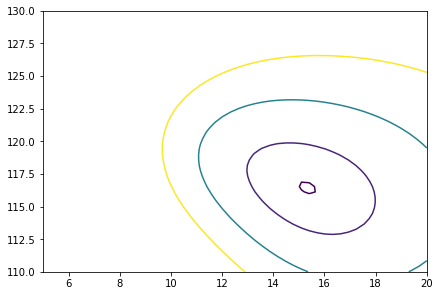

In [16]:
scanA = np.linspace(110.0,130.0,50)
scanB = np.linspace(5,20,50)
Z_binned = [[nll_binned([a,b]) - solution_binned.fun for b in scanB] for a in scanA]

fig1, ax2 = plt.subplots(constrained_layout=True)

# p1 = ax2.contour(scanB, scanA, Z, [0.01,0.5, 2.0, 4.5])
p2 = ax2.contour(scanB, scanA, Z_binned, [0.01,0.5, 2.0, 4.5])# , linestyles="dotted")
plt.show()